In [1]:
import psvWave, numpy, time
from tqdm import autonotebook
import matplotlib.pyplot as plt

/var/folders/h5/77nvs8y15n78p7stbnbb71dw0000gn/T/ipykernel_93034/2841168017.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm import autonotebook


This notebook benchmarks GPU versus CPU forward and adjoint simulations.

In [3]:
settings = psvWave.get_dictionary()

repeats = 10
settings

{'domain': {'nt': 2000,
  'nx_inner': 400,
  'nz_inner': 400,
  'nx_inner_boundary': 10,
  'nz_inner_boundary': 10,
  'dx': 1.249,
  'dz': 1.249,
  'dt': 0.0002},
 'boundary': {'np_boundary': 25, 'np_factor': 0.015},
 'medium': {'scalar_rho': 1500.0, 'scalar_vp': 2000.0, 'scalar_vs': 800.0},
 'sources': {'peak_frequency': 50.0,
  'n_sources': 2,
  'n_shots': 1,
  'source_timeshift': 0.005,
  'delay_cycles_per_shot': 24,
  'moment_angles': [90, 180],
  'ix_sources': [150, 350],
  'iz_sources': [50, 50],
  'which_source_to_fire_in_which_shot': [[0, 1]]},
 'receivers': {'nr': 4,
  'ix_receivers': [50, 150, 250, 350],
  'iz_receivers': [350, 350, 350, 350]},
 'inversion': {'snapshot_interval': 10},
 'basis': {'npx': 1, 'npz': 1},
 'output': {'observed_data_folder': '.', 'stf_folder': '.'}}

In [ ]:
settings["domain"]["nx_inner_boundary"] = 0
settings["domain"]["nz_inner_boundary"] = 0
settings["sources"]["which_source_to_fire_in_which_shot"] = [[0], [1], [2]]
settings["sources"]["n_sources"] = 3
settings["sources"]["n_shots"] = 3
settings["sources"]["moment_angles"] = [90, 180, 75]
settings["receivers"]["nr"] = 10

durations_per_size_forward_GPU = {}
durations_per_size_forward_CPU = {}

domain_sizes = [1600, 1200, 800, 500, 350, 200, 100, 75, 40, 20, 10]
for nx in autonotebook.tqdm(domain_sizes):
    nz = nx

    settings["domain"]["nx_inner"] = nx
    settings["domain"]["nz_inner"] = nz

    settings["sources"]["ix_sources"] = list(numpy.linspace(0, nx, 3, dtype=int))
    settings["sources"]["iz_sources"] = list(
        (1) * numpy.ones_like(settings["sources"]["ix_sources"])
    )

    settings["receivers"]["ix_receivers"] = list(numpy.linspace(0, nx, 10, dtype=int))
    settings["receivers"]["iz_receivers"] = list(
        (nx - 1) * numpy.ones_like(settings["receivers"]["ix_receivers"])
    )

    model = psvWave.from_dictionary(settings)

    durations = []
    for i_timer in autonotebook.trange(repeats):

        t0 = time.time()
        for i_shot in range(model.n_shots):
            model.forward_simulate(
                i_shot,
                store_fields=True,
                verbose=False,
                omp_threads_override=8,
                use_gpu=True,
            )
        t1 = time.time()

        durations.append(t1 - t0)

    durations_per_size_forward_GPU[nx] = durations

    durations = []
    for i_timer in autonotebook.trange(repeats):

        t0 = time.time()
        for i_shot in range(model.n_shots):
            model.forward_simulate(
                i_shot,
                store_fields=True,
                verbose=False,
                omp_threads_override=8,
                use_gpu=False,
            )
        t1 = time.time()

        durations.append(t1 - t0)

    durations_per_size_forward_CPU[nx] = durations

    del model

  0%|          | 0/11 [00:00<?, ?it/s]

Loading configuration file: 'autogenerated.conf'.
Parsing passed configuration.


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Loading configuration file: 'autogenerated.conf'.
Parsing passed configuration.


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Loading configuration file: 'autogenerated.conf'.
Parsing passed configuration.


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Loading configuration file: 'autogenerated.conf'.
Parsing passed configuration.


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Loading configuration file: 'autogenerated.conf'.
Parsing passed configuration.


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Loading configuration file: 'autogenerated.conf'.
Parsing passed configuration.


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
durations_per_size_adjoint_GPU = {}
durations_per_size_adjoint_CPU = {}

for nx in autonotebook.tqdm(domain_sizes):
    nz = nx

    settings["domain"]["nx_inner"] = nx
    settings["domain"]["nz_inner"] = nz

    settings["sources"]["ix_sources"] = list(numpy.linspace(0, nx, 3, dtype=int))
    settings["sources"]["iz_sources"] = list(
        (1) * numpy.ones_like(settings["sources"]["ix_sources"])
    )

    settings["receivers"]["ix_receivers"] = list(numpy.linspace(0, nx, 10, dtype=int))
    settings["receivers"]["iz_receivers"] = list(
        (nx - 1) * numpy.ones_like(settings["receivers"]["ix_receivers"])
    )

    model = psvWave.from_dictionary(settings)

    durations = []
    for i_timer in autonotebook.trange(repeats):

        t0 = time.time()
        for i_shot in range(model.n_shots):
            model.adjoint_simulate(
                i_shot, verbose=False, omp_threads_override=8, use_gpu=True
            )
        t1 = time.time()

        durations.append(t1 - t0)

    durations_per_size_adjoint_GPU[nx] = durations

    durations = []
    for i_timer in autonotebook.trange(repeats):

        t0 = time.time()
        for i_shot in range(model.n_shots):
            model.adjoint_simulate(
                i_shot, verbose=False, omp_threads_override=8, use_gpu=False
            )
        t1 = time.time()

        durations.append(t1 - t0)

    durations_per_size_adjoint_CPU[nx] = durations

    del model

In [10]:
mean_durations_forward_GPU = numpy.array(
    [
        numpy.mean(durations_per_size_forward_GPU[size])
        for size in durations_per_size_forward_GPU
    ]
)
mean_durations_forward_CPU = numpy.array(
    [
        numpy.mean(durations_per_size_forward_CPU[size])
        for size in durations_per_size_forward_CPU
    ]
)

mean_durations_adjoint_GPU = numpy.array(
    [
        numpy.mean(durations_per_size_adjoint_GPU[size])
        for size in durations_per_size_adjoint_GPU
    ]
)
mean_durations_adjoint_CPU = numpy.array(
    [
        numpy.mean(durations_per_size_adjoint_CPU[size])
        for size in durations_per_size_adjoint_CPU
    ]
)

In [17]:
for size in domain_sizes:
    numpy.save(f"durations_{size}_forward_gpu.npy", durations_per_size_forward_GPU[size])
    numpy.save(f"durations_{size}_forward_cpu.npy", durations_per_size_forward_CPU[size])
    numpy.save(f"durations_{size}_adjoint_gpu.npy", durations_per_size_adjoint_GPU[size])
    numpy.save(f"durations_{size}_adjoint_cpu.npy", durations_per_size_adjoint_CPU[size])

(11, 10)

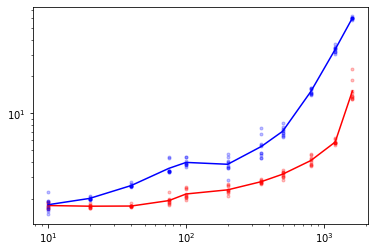

In [50]:
domain_sizes = [1600, 1200, 800, 500, 350, 200, 100, 75, 40, 20, 10]

plt.loglog(domain_sizes, numpy.array(list(durations_per_size_forward_GPU.values())),".r", alpha=0.25)
plt.loglog(domain_sizes, numpy.array(list(durations_per_size_forward_CPU.values())),".b", alpha=0.25)
plt.loglog(domain_sizes, numpy.array(list(durations_per_size_forward_GPU.values())).mean(axis=1),"r")
plt.loglog(domain_sizes, numpy.array(list(durations_per_size_forward_CPU.values())).mean(axis=1),"b")

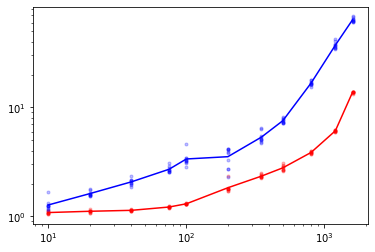

In [49]:
domain_sizes = [1600, 1200, 800, 500, 350, 200, 100, 75, 40, 20, 10]

plt.loglog(domain_sizes, numpy.array(list(durations_per_size_adjoint_GPU.values())),".r", alpha=0.25)
plt.loglog(domain_sizes, numpy.array(list(durations_per_size_adjoint_CPU.values())),".b", alpha=0.25)
plt.loglog(domain_sizes, numpy.array(list(durations_per_size_adjoint_GPU.values())).mean(axis=1),"r")
plt.loglog(domain_sizes, numpy.array(list(durations_per_size_adjoint_CPU.values())).mean(axis=1),"b")

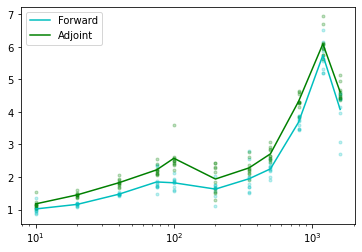

In [55]:
plt.semilogx(
    domain_sizes,
    numpy.array(list(durations_per_size_forward_CPU.values()))
    / numpy.array(list(durations_per_size_forward_GPU.values())),
    ".c",
    alpha=0.25,
)
plt.semilogx(
    domain_sizes,
    numpy.array(list(durations_per_size_adjoint_CPU.values()))
    / numpy.array(list(durations_per_size_adjoint_GPU.values())),
    ".g",
    alpha=0.25,
)


plt.semilogx(
    domain_sizes,
(    numpy.array(list(durations_per_size_forward_CPU.values()))
    / numpy.array(list(durations_per_size_forward_GPU.values()))).mean(axis=1),
    "c",
    label="Forward",
)
plt.semilogx(
    domain_sizes,
(    numpy.array(list(durations_per_size_adjoint_CPU.values()))
    / numpy.array(list(durations_per_size_adjoint_GPU.values()))).mean(axis=1),
    "g",
    label="Adjoint",
)
plt.legend()

In [104]:
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]

fig, axes = plt.subplots(3, 1, sharex=True, sharey=False, figsize=(4, 5))

plt.subplot(3, 1, 1)

plt.grid()
plt.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.1)
plt.grid(visible=True, which="minor", color="k", linestyle="--", alpha=0.1)


plt.loglog(
    domain_sizes,
    numpy.array(list(durations_per_size_forward_GPU.values())),
    colors[0],
            linestyle="",
    marker=".",
    alpha=0.25,
)
plt.loglog(
    domain_sizes,
    numpy.array(list(durations_per_size_forward_CPU.values())),
    colors[1],
            linestyle="",
    marker=".",
    alpha=0.25,
)
plt.loglog(
    domain_sizes,
    numpy.array(list(durations_per_size_forward_GPU.values())).mean(axis=1),
    colors[0],
)
plt.loglog(
    domain_sizes,
    numpy.array(list(durations_per_size_forward_CPU.values())).mean(axis=1),
    colors[1],
)
plt.ylim([0.4e0, 1e2])
plt.ylabel("runtime [s]")

plt.text(
    0.05,
    0.9,
    "Forward",
    horizontalalignment="left",
    verticalalignment="center",
    fontweight="bold",
    transform=plt.gca().transAxes,
)

plt.subplot(3, 1, 2)


plt.grid()
plt.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.1)
plt.grid(visible=True, which="minor", color="k", linestyle="--", alpha=0.1)


plt.loglog(
    domain_sizes,
    numpy.array(list(durations_per_size_adjoint_GPU.values())),
    colors[0],
            linestyle="",
    marker=".",
    alpha=0.25,
)
plt.loglog(
    domain_sizes,
    numpy.array(list(durations_per_size_adjoint_CPU.values())),
    colors[1],
            linestyle="",
    marker=".",
    alpha=0.25,
)
plt.loglog(
    domain_sizes,
    numpy.array(list(durations_per_size_adjoint_GPU.values())).mean(axis=1),
    colors[0],
    label="GPU",
)
plt.loglog(
    domain_sizes,
    numpy.array(list(durations_per_size_adjoint_CPU.values())).mean(axis=1),
    colors[1],
    label="CPU",
)
plt.ylim([0.4e0, 1e2])
plt.ylabel("runtime [s]")

plt.legend(loc="lower right", ncol=2, fontsize=5)
plt.text(
    0.05,
    0.9,
    "Adjoint",
    horizontalalignment="left",
    verticalalignment="center",
    fontweight="bold",
    transform=plt.gca().transAxes,
)

plt.subplot(3, 1, 3)


plt.grid()
plt.grid(visible=True, which="major", color="k", linestyle="-", alpha=0.1)
plt.grid(visible=True, which="minor", color="k", linestyle="--", alpha=0.1)

plt.semilogx(
    domain_sizes,
    numpy.array(list(durations_per_size_forward_CPU.values()))
    / numpy.array(list(durations_per_size_forward_GPU.values())),
    colors[4],
    linestyle="",
    marker=".",
    alpha=0.25,
)
plt.semilogx(
    domain_sizes,
    numpy.array(list(durations_per_size_adjoint_CPU.values()))
    / numpy.array(list(durations_per_size_adjoint_GPU.values())),
    colors[5],
    linestyle="",
    marker=".",
    alpha=0.25,
)


plt.semilogx(
    domain_sizes,
    (
        numpy.array(list(durations_per_size_forward_CPU.values()))
        / numpy.array(list(durations_per_size_forward_GPU.values()))
    ).mean(axis=1),
    colors[4],
    label="Forward",
)
plt.semilogx(
    domain_sizes,
    (
        numpy.array(list(durations_per_size_adjoint_CPU.values()))
        / numpy.array(list(durations_per_size_adjoint_GPU.values()))
    ).mean(axis=1),
    colors[5],
    label="Adjoint",
)
plt.legend(loc="lower right", ncol=2, fontsize=5)

plt.yscale("log")
plt.xscale("log")


plt.gca().set_xticks(
    [10, 20, 40, 80, 160, 320, 640, 1280],
    [
        f"{domain_sizes}x{domain_sizes}"
        for domain_sizes in [10, 20, 40, 80, 160, 320, 640, 1280]
    ],
    rotation=50,
)

plt.gca().set_yticks(
    [1, 2, 4, 8],
    [f"{speedup}" for speedup in [1, 2, 4, 8]],
)

xlim = plt.xlim()
plt.gca().set_xticks(
    [2 ** float(i) for i in []],
    minor=True,
    labels=[],
)
plt.xlim(xlim)
plt.xlabel("domain size")
plt.ylabel("speedup [factor]")

plt.text(
    0.05,
    0.9,
    "Speed-up",
    horizontalalignment="left",
    verticalalignment="center",
    fontweight="bold",
    transform=plt.gca().transAxes,
)

plt.tight_layout()

fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig("FWI.pdf", dpi=300, format="pdf")
plt.close()